In [28]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [29]:
df_data = pd.read_csv('data/cleaned/Netty-Unified.csv')
df_data = df_data.iloc[:, 1:]
df_data

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
0,0.0,0,0,0,0.0,0.0,0,0,1,1,...,2,0,2,0,2,8,0,2,0,0
1,0.0,0,0,0,0.0,0.0,0,0,5,0,...,5,0,5,0,5,5,0,5,0,0
2,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0,0,0,0.0,0.0,0,0,1,0,...,9,0,9,0,9,1,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0.0,0,0,0,0.0,0.0,0,0,1,0,...,3,0,1,0,3,3,0,1,0,0
1140,0.0,0,0,0,0.0,0.0,0,0,2,0,...,2,0,2,0,5,3,0,5,0,0
1141,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      1143 non-null   float64
 1   CCL     1143 non-null   int64  
 2   CCO     1143 non-null   int64  
 3   CI      1143 non-null   int64  
 4   CLC     1143 non-null   float64
 5   CLLC    1143 non-null   float64
 6   LDC     1143 non-null   int64  
 7   LLDC    1143 non-null   int64  
 8   LCOM5   1143 non-null   int64  
 9   NL      1143 non-null   int64  
 10  NLE     1143 non-null   int64  
 11  WMC     1143 non-null   int64  
 12  CBO     1143 non-null   int64  
 13  CBOI    1143 non-null   int64  
 14  NII     1143 non-null   int64  
 15  NOI     1143 non-null   int64  
 16  RFC     1143 non-null   int64  
 17  AD      1143 non-null   float64
 18  CD      1143 non-null   float64
 19  CLOC    1143 non-null   int64  
 20  DLOC    1143 non-null   int64  
 21  PDA     1143 non-null   int64  
 22  

In [31]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.151581,0.707787,3.302712,1.026247,0.133842,0.142677,12.008749,10.869641,1.913386,1.133858,...,7.433946,0.729659,5.684164,0.486439,20.007874,31.619423,1.158355,15.196850,0.857393,0.237095
std,0.304463,2.107114,12.836547,3.760241,0.284517,0.293378,42.411977,39.711984,3.570950,1.557008,...,17.127899,5.709815,14.664878,2.144422,30.370925,78.821760,6.014747,25.189313,3.094789,0.425487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,3.000000,0.000000,2.000000,0.000000,11.000000,8.000000,0.000000,8.000000,0.000000,0.000000
75%,0.124412,1.000000,1.000000,1.000000,0.083508,0.107361,6.000000,6.000000,2.000000,2.000000,...,7.000000,0.000000,5.000000,0.000000,23.000000,29.000000,0.000000,17.000000,0.000000,0.000000
max,1.000000,29.000000,221.000000,64.000000,1.000000,1.000000,749.000000,737.000000,71.000000,15.000000,...,327.000000,106.000000,270.000000,19.000000,327.000000,1142.000000,106.000000,270.000000,26.000000,1.000000


In [6]:
# metric correlations- (step 1)

In [32]:
X_train_size_comlexity_features = df_data[['CCO','NLE','NII','NOI','TCLOC','PUA','TNOS']]
X_train_oop_features = df_data[['LCOM5','NOC','CBOI','NPA','NG','NA','WMC','CBO','RFC','NS','DIT']]

In [33]:
X_train_size_comlexity_features = df_data[['CCO','NLE','NII','NOI','TCLOC','PUA','TNOS']]
X_train_oop_features = df_data[['LCOM5','NOC','WMC','CBO','RFC','DIT']]

In [199]:
# Variance inflation factor analysis  (VIF) - setp 2

In [34]:
def vif(features):

    # Prepare a dataframe for VIF
    X_VIF = add_constant(features)

    # Simulate a multicollinearity situation of AddedLOC, A, and B
    #X_VIF['A'] = [2 * x_i + random.random() for x_i in X_VIF['AddedLOC']]
    #X_VIF['B'] = [3 * x_i + random.random() for x_i in X_VIF['AddedLOC']]

    # Calculate VIF scores
    vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
                   for i in range(X_VIF.shape[1])], 
                  index=X_VIF.columns)
    # Prepare a final dataframe of VIF scores
    vif_scores.reset_index(inplace = True)
    vif_scores.columns = ['Feature', 'VIFscore']
    vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
    vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
    return vif_scores

In [35]:
vif(X_train_size_comlexity_features)

,Feature,VIFscore
7,TNOS,4.040070
4,NOI,2.281326
1,CCO,2.122696
6,PUA,1.826645
2,NLE,1.485380
5,TCLOC,1.397850
3,NII,1.169744


In [88]:
# drop columns 7

In [8]:
#X_train_size_comlexity_features= X_train_size_comlexity_features.drop(labels=['TNOS'],axis='columns')

In [36]:
vif(X_train_size_comlexity_features)

,Feature,VIFscore
7,TNOS,4.040070
4,NOI,2.281326
1,CCO,2.122696
6,PUA,1.826645
2,NLE,1.485380
5,TCLOC,1.397850
3,NII,1.169744


In [37]:
X_train_size_comlexity_features.columns

Index(['CCO', 'NLE', 'NII', 'NOI', 'TCLOC', 'PUA', 'TNOS'], dtype='object')

In [38]:
vif(X_train_oop_features)

,Feature,VIFscore
5,RFC,4.950776
3,WMC,3.637993
4,CBO,1.527045
1,LCOM5,1.504860
6,DIT,1.168448
2,NOC,1.005355


In [92]:
# drop columns 9,10,5,6

In [85]:
#X_train_oop_features= X_train_oop_features.drop(labels=['RFC'],axis='columns')

In [39]:
vif(X_train_oop_features)

,Feature,VIFscore
5,RFC,4.950776
3,WMC,3.637993
4,CBO,1.527045
1,LCOM5,1.504860
6,DIT,1.168448
2,NOC,1.005355


In [40]:
X_train_oop_features.columns

Index(['LCOM5', 'NOC', 'WMC', 'CBO', 'RFC', 'DIT'], dtype='object')

In [ ]:
#featres after step1 & step 2

In [41]:
X_train_all_features = pd.concat([X_train_size_comlexity_features, X_train_oop_features], axis=1)

In [42]:
vif(X_train_all_features)

,Feature,VIFscore
12,RFC,66.570283
4,NOI,21.539173
6,PUA,14.688633
10,WMC,10.036912
7,TNOS,5.873887
11,CBO,2.815675
1,CCO,2.197980
8,LCOM5,1.937873
5,TCLOC,1.912436
2,NLE,1.787451


In [43]:
X_train_all_features= X_train_all_features.drop(labels=['RFC'],axis='columns')

In [44]:
vif(X_train_all_features)

,Feature,VIFscore
10,WMC,7.499555
7,TNOS,5.828173
4,NOI,4.557562
6,PUA,4.312484
11,CBO,2.811263
1,CCO,2.196116
8,LCOM5,1.824730
2,NLE,1.785361
5,TCLOC,1.693620
3,NII,1.252619


In [45]:
X_train_all_features= X_train_all_features.drop(labels=['TNOS'],axis='columns')

In [46]:
vif(X_train_all_features)

,Feature,VIFscore
9,WMC,5.391291
6,PUA,4.234219
4,NOI,4.131912
10,CBO,2.737221
7,LCOM5,1.823461
2,NLE,1.784028
5,TCLOC,1.692381
1,CCO,1.455364
3,NII,1.249752
11,DIT,1.187306


In [47]:
X_train_all_features= X_train_all_features.drop(labels=['WMC'],axis='columns')

In [48]:
X = df_data.iloc[:, 0:-1]
y = df_data["bug"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (1143, 60)
y: (1143,)


In [ ]:
#resampling

Classes: [0, 1]
Counts: [872, 271]


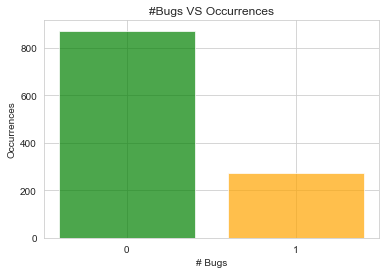

In [53]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [19]:
#oversampling using SMOTE up to 30%

In [50]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE(sampling_strategy=0.3).fit_resample(X_train_all_features, y)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape)

ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

In [52]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

NameError: name 'y_train_over_sampled' is not defined

In [25]:
bugs= y_train_over_sampled.groupby(y_train_over_sampled)
bugs.size()

NameError: name 'y_train_over_sampled' is not defined

In [54]:
# does not require resampling
X_train_over_sampled = X_train_all_features
y_train_over_sampled = y
data = pd.concat([X_train_over_sampled, y_train_over_sampled], axis=1)

In [55]:
data

,CCO,NLE,NII,NOI,TCLOC,PUA,LCOM5,NOC,CBO,DIT,bug
0,0,1,0,0,0,3,1,0,0,0,0
1,0,0,0,0,0,6,5,1,7,1,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,0
4,0,0,4,0,0,10,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,6,0,0,0,0,0,0
1139,0,0,0,0,3,1,1,0,1,1,0
1140,0,0,0,2,6,2,2,0,2,2,0
1141,0,0,0,0,3,0,0,0,0,0,0


In [28]:
# save the dataset for c5
filename = 'Netty-Unified.csv'
data.to_csv('data/cleaned/expr2/{}'.format(filename),sep=',')

In [116]:
# Model construction

In [56]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)


Train: (800, 10) (800,) Test: (172, 10) (172,) Cross Validation (171, 10) (171,)


In [64]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [31]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [32]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [33]:
scores = {}

In [85]:
# classifiers after removing multi columnary and over sampling

In [90]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {'learning_rate': 0.1, 'n_estimators': 100}


accuracy: 85.46511627906976 %
recall: 65.9688858384809 %
ROC: 65.9688858384809 %


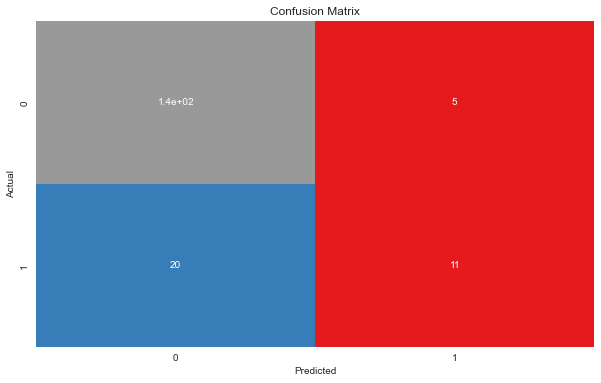

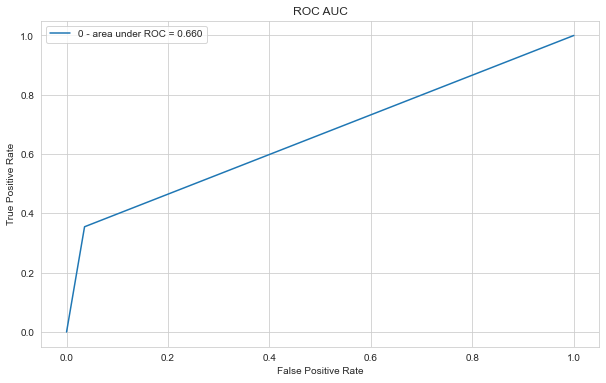

In [91]:
model_scoring = model_eval(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

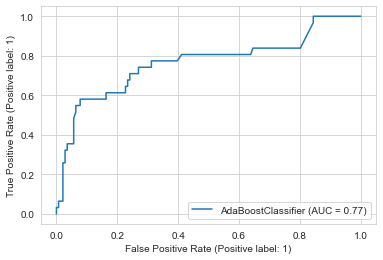

In [92]:
ROC_curve = plot_roc_curve(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [127]:
#xgboost

In [93]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[12:21:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.9}


accuracy: 84.88372093023256 %
recall: 73.1640356897735 %
ROC: 73.16403568977351 %


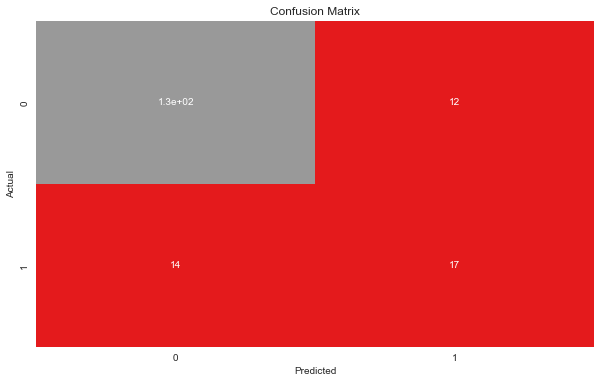

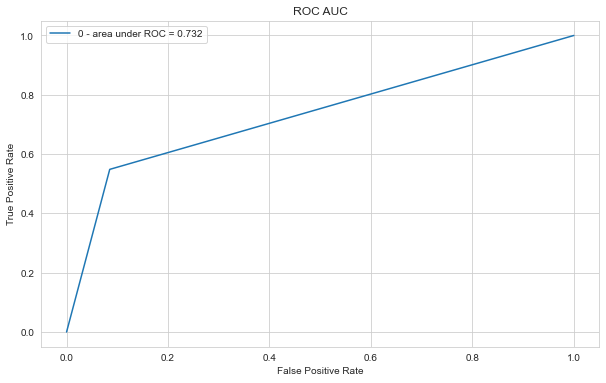

In [94]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

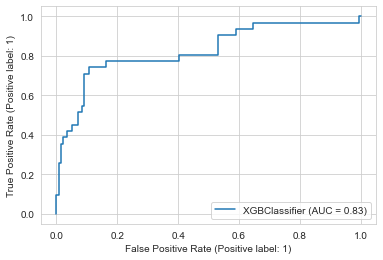

In [95]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# Random Forest

In [48]:
rfc_params = {
    'clf__n_estimators'      : [200, 500],
    'clf__max_depth'         : [10, 20],
    'clf__max_features': [1.0, 0.7, 0.3],
    'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, rfc_params, scale=False) 

Best Parameters for model: {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.3, 'n_estimators': 500}


accuracy: 86.04651162790698 %
recall: 68.9051094890511 %
ROC: 68.9051094890511 %


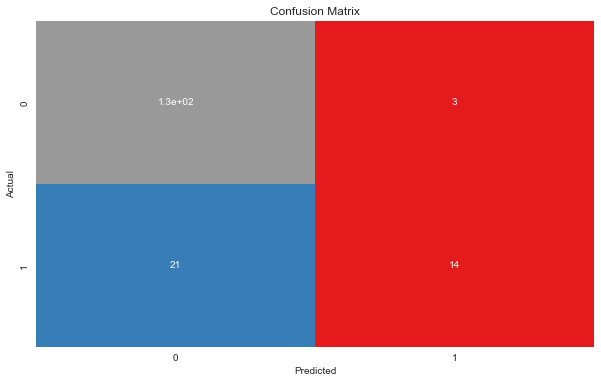

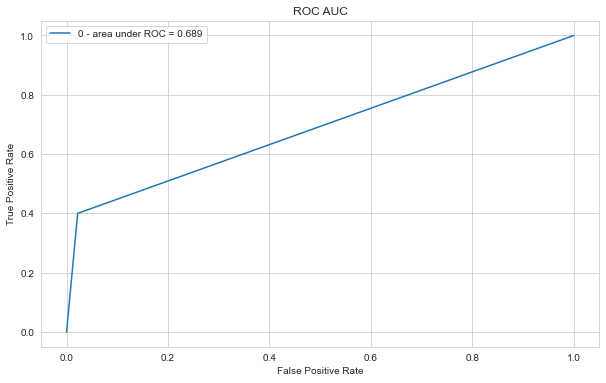

In [49]:
model_scoring = model_eval(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

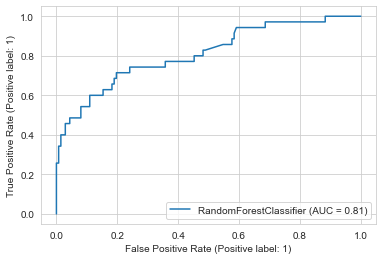

In [50]:
ROC_curve = plot_roc_curve(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [136]:
# SVC

In [99]:
svc_params = {
    'clf__C': [0.1, 1],
    'clf__kernel': ['rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


accuracy: 81.97674418604652 %
recall: 50.0 %
ROC: 50.0 %


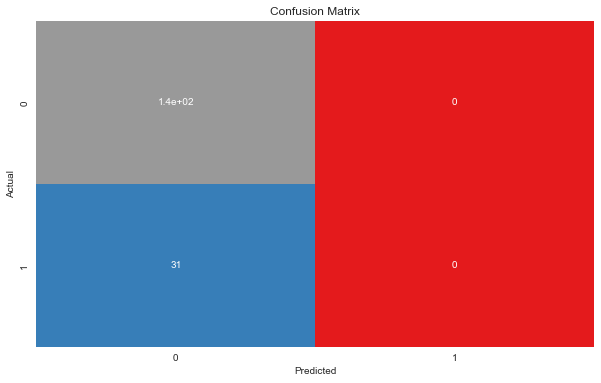

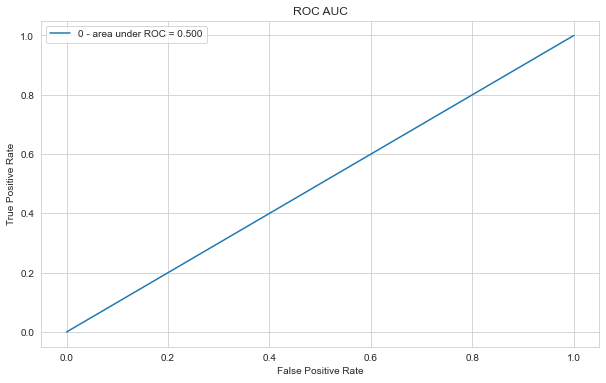

In [100]:
model_scoring = model_eval(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

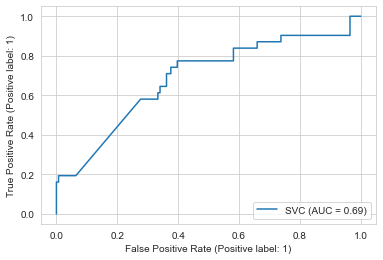

In [101]:
ROC_curve = plot_roc_curve(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [102]:
naive_bayes = Modeler(GaussianNB, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 79.06976744186046 %
recall: 57.03500343170899 %
ROC: 57.035003431709 %


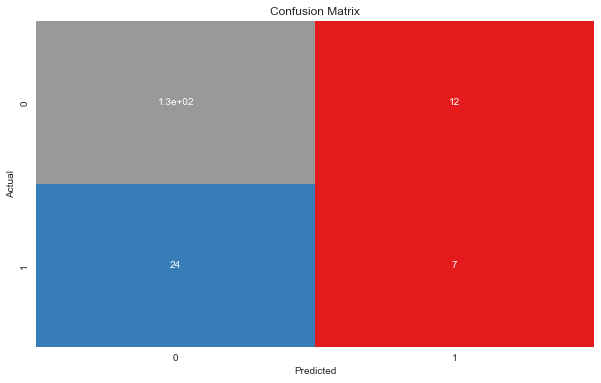

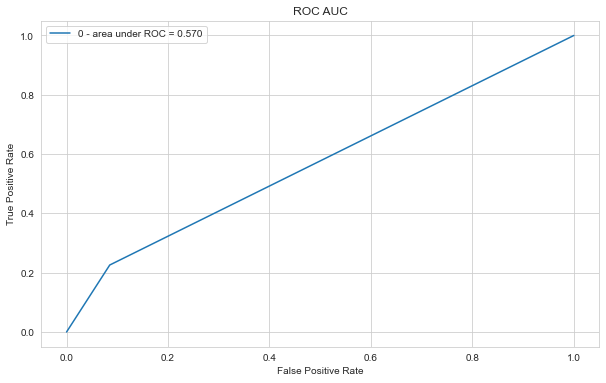

In [103]:
model_scoring = model_eval(naive_bayes["model"], X_test_over_sampled, y_test_over_sampled)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

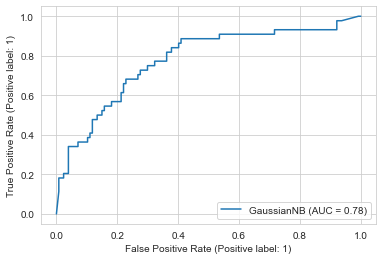

In [104]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv_over_sampled, y_cv_over_sampled)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [175]:
# Model Evaluation Comparision

In [105]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('AUC', ascending=False)

In [106]:
score_df

,Accuracy,ROC,F1-Score,Recall-Score,AUC
Random Forest | Binary,88.37,74.03,77.34,74.03,84.69
XGBoost | Binary,84.88,73.16,73.76,73.16,82.68
Naive Bayes | Binary,79.07,57.04,57.88,57.04,77.74
AdaBoost Classifier | Binary,85.47,65.97,69.20,65.97,76.50
Support-Vector Machine | Binary,81.98,50.00,45.05,50.00,68.79


In [123]:
#feature importance using xgboost

In [58]:
model = XGBClassifier()
model.fit(X_train_over_sampled,y_train_over_sampled)

[00:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
features = pd.DataFrame(model.feature_importances_)
features.describe()

,0
count,10.000000
mean,0.100000
std,0.040842
min,0.045186
25%,0.085397
50%,0.087015
75%,0.113641
max,0.193835


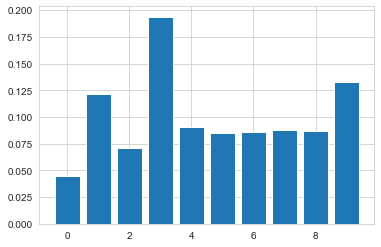

In [70]:
pyplot.bar(range(len(model.feature_importances_)),model.feature_importances_)
pyplot.show()

In [62]:
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):
    print(feature)

('CCO', 0.045186423)
('NLE', 0.12140101)
('NII', 0.07108656)
('NOI', 0.19383506)
('TCLOC', 0.09036193)
('PUA', 0.08509341)
('LCOM5', 0.08630843)
('NOC', 0.08733408)
('CBO', 0.08669637)
('DIT', 0.1326967)


In [71]:
feature_list=[];
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):
    feature_list.append(feature)
feature_list.sort(key=lambda item: item[1])
feature_list.reverse()
features= pd.DataFrame(feature_list)
features

,0,1
0,NOI,0.193835
1,DIT,0.132697
2,NLE,0.121401
3,TCLOC,0.090362
4,NOC,0.087334
5,CBO,0.086696
6,LCOM5,0.086308
7,PUA,0.085093
8,NII,0.071087
9,CCO,0.045186


In [167]:
feature_list=[];
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):
    if feature[1] > 0.054:
        print(feature)
        feature_list.append(feature)

('LOC_BLANK', 0.10278101)
('PERCENT_COMMENTS', 0.16066277)
('PARAMETER_COUNT', 0.1322404)
('CONDITION_COUNT', 0.18246835)
('CYCLOMATIC_DENSITY', 0.10620168)
('DESIGN_COMPLEXITY', 0.10247912)
('ESSENTIAL_COMPLEXITY', 0.06730934)


In [ ]:
# ranking features

In [173]:
feature_list.sort(key=lambda item: item[1])
feature_list.reverse()
features= pd.DataFrame(feature_list)
features

,0,1
0,CONDITION_COUNT,0.182468
1,PERCENT_COMMENTS,0.160663
2,PARAMETER_COUNT,0.132240
3,CYCLOMATIC_DENSITY,0.106202
4,LOC_BLANK,0.102781
5,DESIGN_COMPLEXITY,0.102479
6,ESSENTIAL_COMPLEXITY,0.067309


In [174]:
sfm=SelectFromModel(model,threshold=0.054)
X_important_train=sfm.fit(X_train_over_sampled,y_train_over_sampled)

[19:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [175]:
X_train_important_over_sampled = X_important_train.transform(X_train_over_sampled)

In [176]:
X_train_important_over_sampled.shape

(1092, 7)

In [ ]:
#

In [179]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_important_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)

Train: (764, 7) (764,) Test: (164, 7) (164,) Cross Validation (164, 7) (164,)


In [127]:
#xgboost

In [181]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[19:29:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.8}


accuracy: 86.58536585365853 %
ROC: 82.71972760161736 %


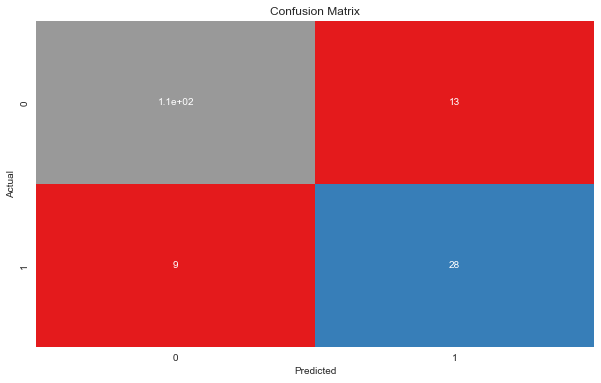

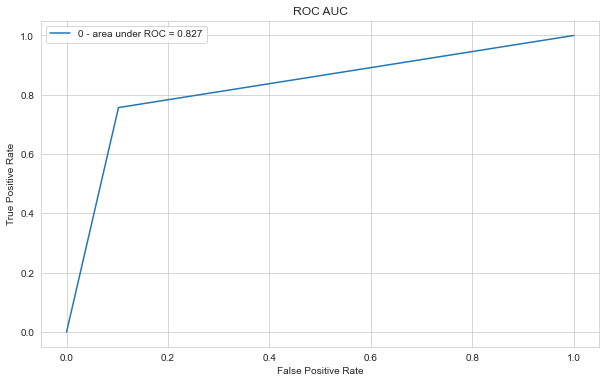

In [182]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled, multi=False)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100)}

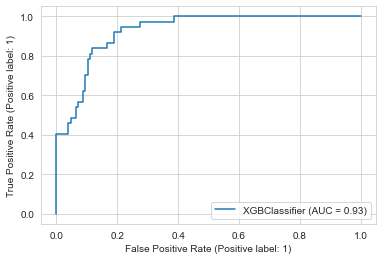

In [183]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)